In [86]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [12]:
#Load the dataset
df=pd.read_excel('Online Retail.xlsx')

df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [14]:
df.dropna(inplace=True)

In [15]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406829.000000,406829,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,248.693370,NaN,69.315162,1713.600303


In [16]:
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df1=df[df['InvoiceNo'].str.contains('C')]

df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [17]:
df = df[~df['InvoiceNo'].str.contains('C')]

In [18]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [19]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,397924.000000,397924,397924.000000,397924.000000
mean,13.021823,2011-07-10 23:43:36.912475648,3.116174,15294.315171
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,180.420210,NaN,22.096788,1713.169877


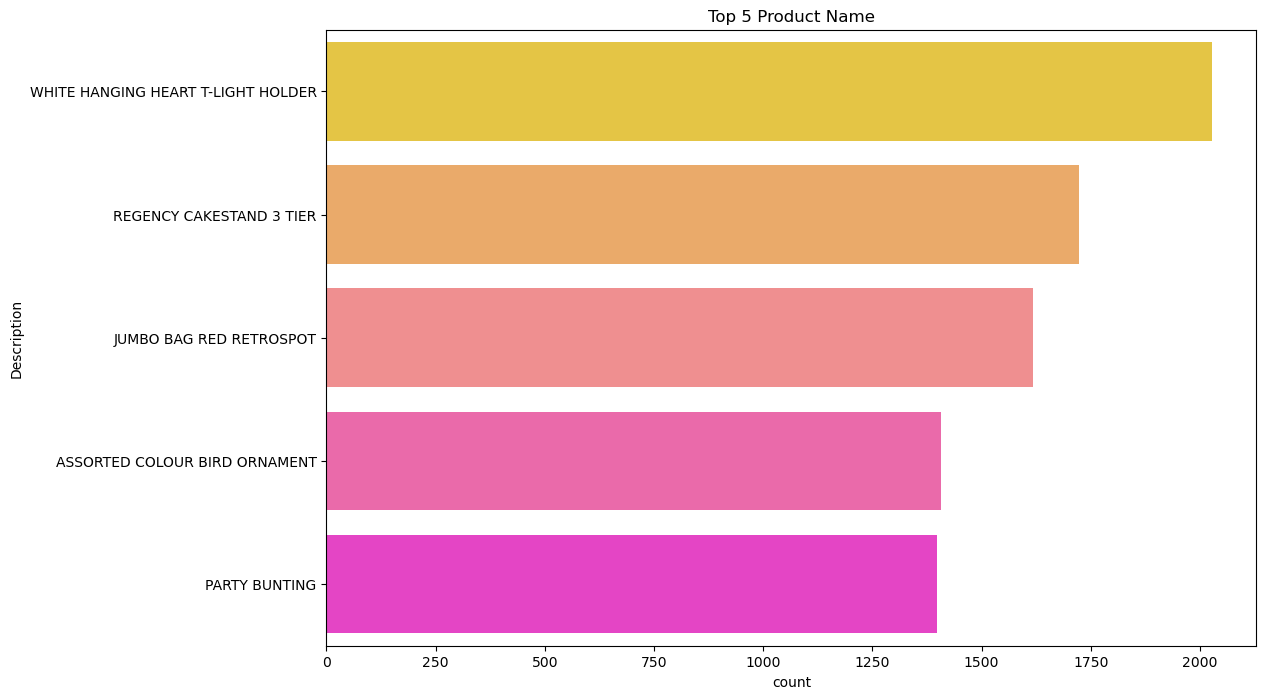

In [20]:
Description_df=df['Description'].value_counts().reset_index()
Description_df.rename(columns={'index': 'Description_Name'}, inplace=True)

plt.figure(figsize=(12,8))
plt.title('Top 5 Product Name')
sns.barplot(x='count',y='Description',data=Description_df[:5], palette='spring_r');

In [21]:
#bottom 5 description name
Description_df.tail()

,Description,count
3872,RUBY GLASS CLUSTER EARRINGS,1
3873,PINK CHRYSANTHEMUMS ART FLOWER,1
3874,72 CAKE CASES VINTAGE CHRISTMAS,1
3875,"WALL ART , THE MAGIC FOREST",1
3876,"PAPER CRAFT , LITTLE BIRDIE",1


In [22]:
StockCode_df=df['StockCode'].value_counts().reset_index()
StockCode_df.rename(columns={'index': 'StockCode_Name'}, inplace=True)
# StockCode_df.rename(columns={'StockCode': 'Count'}, inplace=True)
#top 5 stockcode name
StockCode_df

,StockCode,count
0,85123A,2035
1,22423,1724
2,85099B,1618
3,84879,1408
4,47566,1397
...,...,...
3660,90168,1
3661,90169,1
3662,90202A,1
3663,90118,1


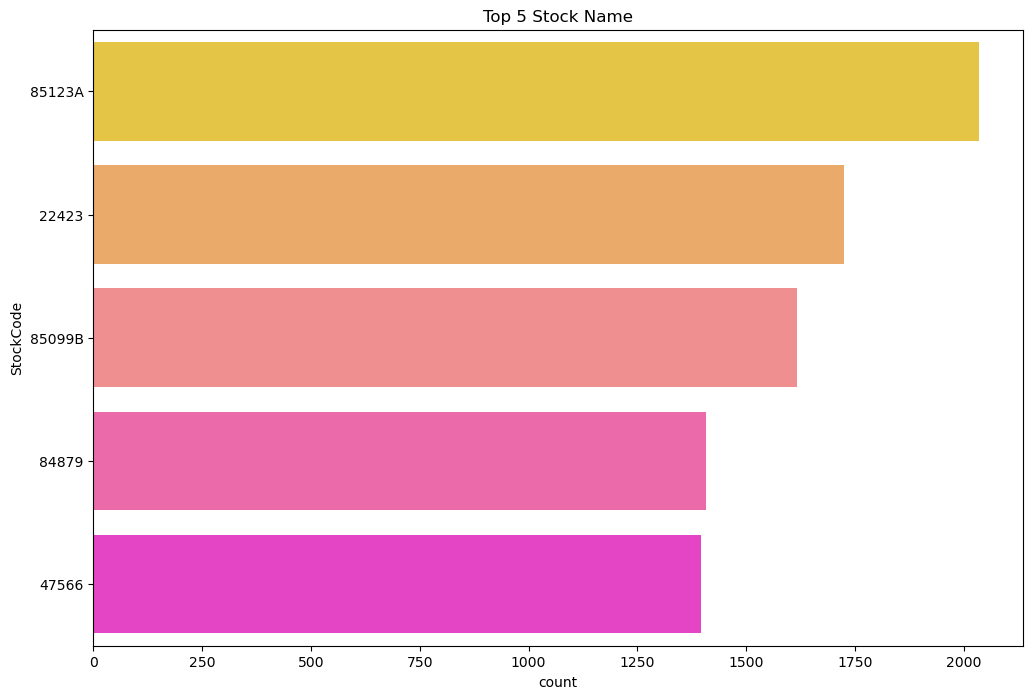

In [23]:
#plot top 5 stockcode name
plt.figure(figsize=(12,8))
plt.title('Top 5 Stock Name')
sns.barplot(x='count',y='StockCode',data=StockCode_df[:5], palette='spring_r');

In [24]:
#bottom 5 stockcode name
StockCode_df.tail()

,StockCode,count
3660,90168,1
3661,90169,1
3662,90202A,1
3663,90118,1
3664,23843,1


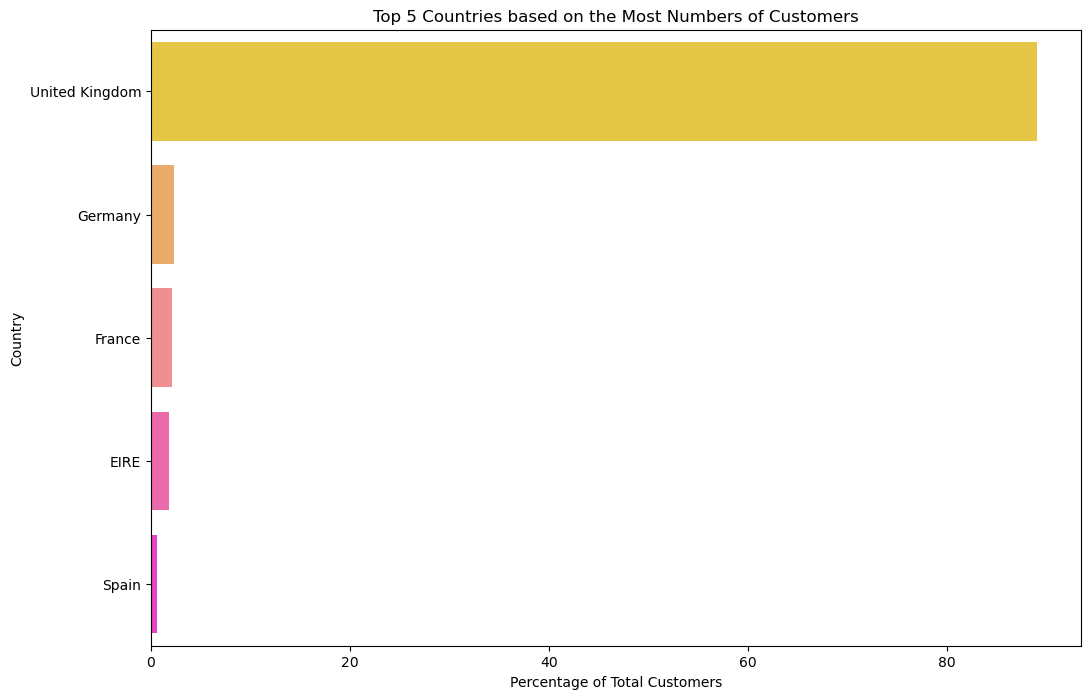

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

country_df = df['Country'].value_counts().reset_index()
country_df.columns = ['Country_Name', 'Count']

total_customers = country_df['Count'].sum()
country_df['Percentage'] = (country_df['Count'] / total_customers) * 100

plt.figure(figsize=(12, 8))
plt.title('Top 5 Countries based on the Most Numbers of Customers')
sns.barplot(x='Percentage', y='Country_Name', data=country_df[:5], palette='spring_r')
plt.xlabel('Percentage of Total Customers')
plt.ylabel('Country')
plt.show()

#country_df

In [35]:
country_df

,Country_Name,Count,Percentage
0,United Kingdom,354345,89.048411
1,Germany,9042,2.272293
2,France,8342,2.096380
3,EIRE,7238,1.818940
4,Spain,2485,0.624491
5,Netherlands,2363,0.593832
6,Belgium,2031,0.510399
7,Switzerland,1842,0.462902
8,Portugal,1462,0.367407
9,Australia,1185,0.297796


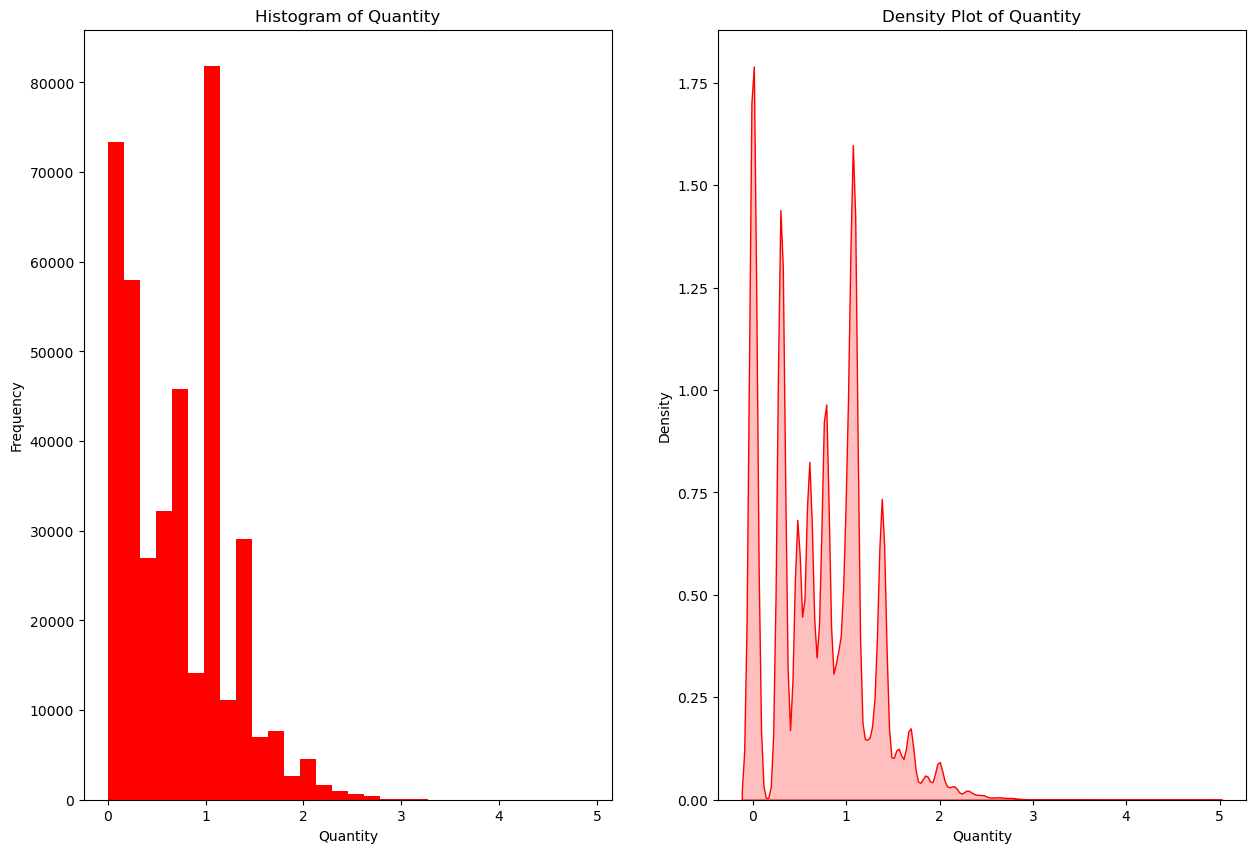

In [49]:
plt.figure(figsize=(15, 10))

# Histogram
plt.subplot(1, 2, 1)
plt.title('Histogram of Quantity')
plt.hist(np.log10(df['Quantity']), color="r", bins=30)
plt.xlabel('Quantity')
plt.ylabel('Frequency')

# Density plot
plt.subplot(1, 2, 2)
plt.title('Density Plot of Quantity')
sns.kdeplot(np.log10(df['Quantity']), color="r", shade=True)
plt.xlabel('Quantity')
plt.ylabel('Density')

plt.show()

<Axes: title={'center': 'UnitPrice distribution'}, xlabel='UnitPrice', ylabel='Density'>

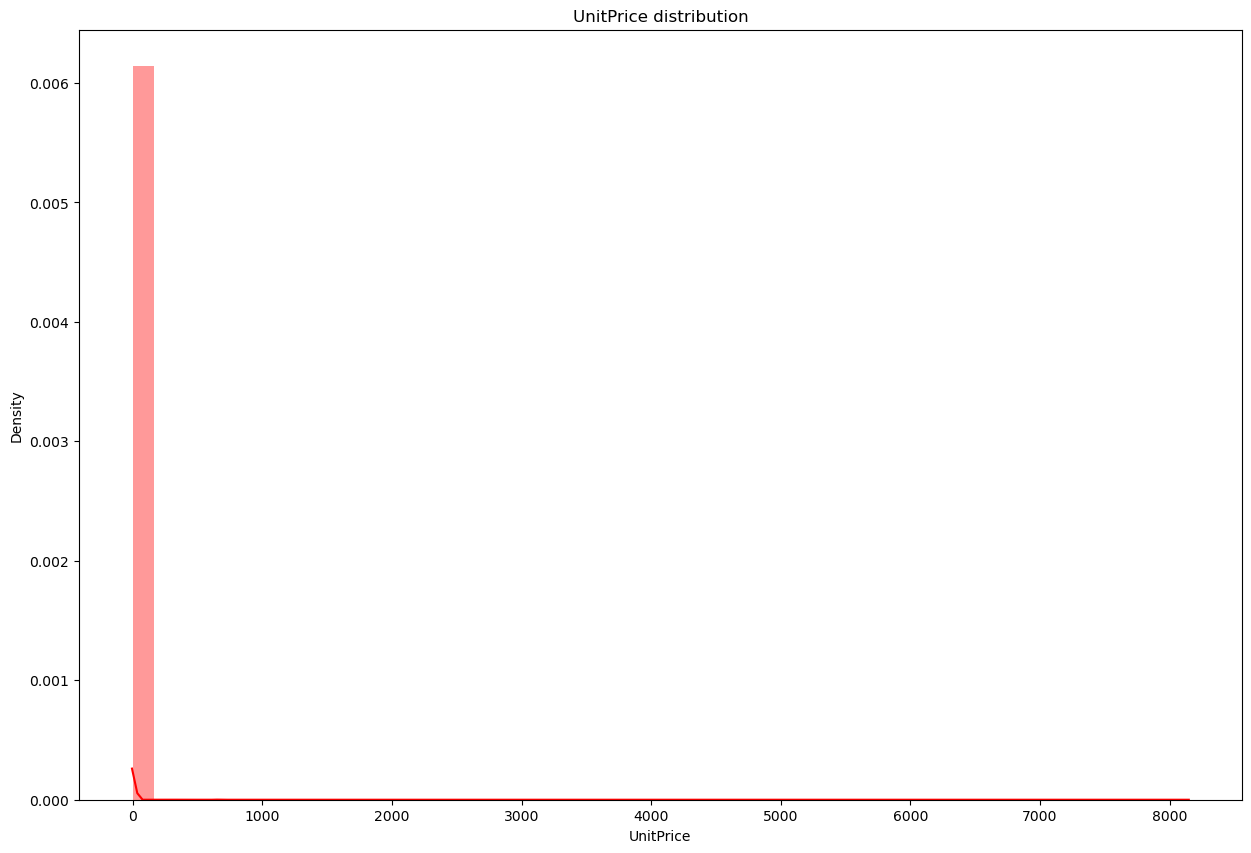

In [51]:
#distribution of unit price
plt.figure(figsize=(15,10))
plt.title('UnitPrice distribution')
sns.distplot(df['UnitPrice'],color="r")

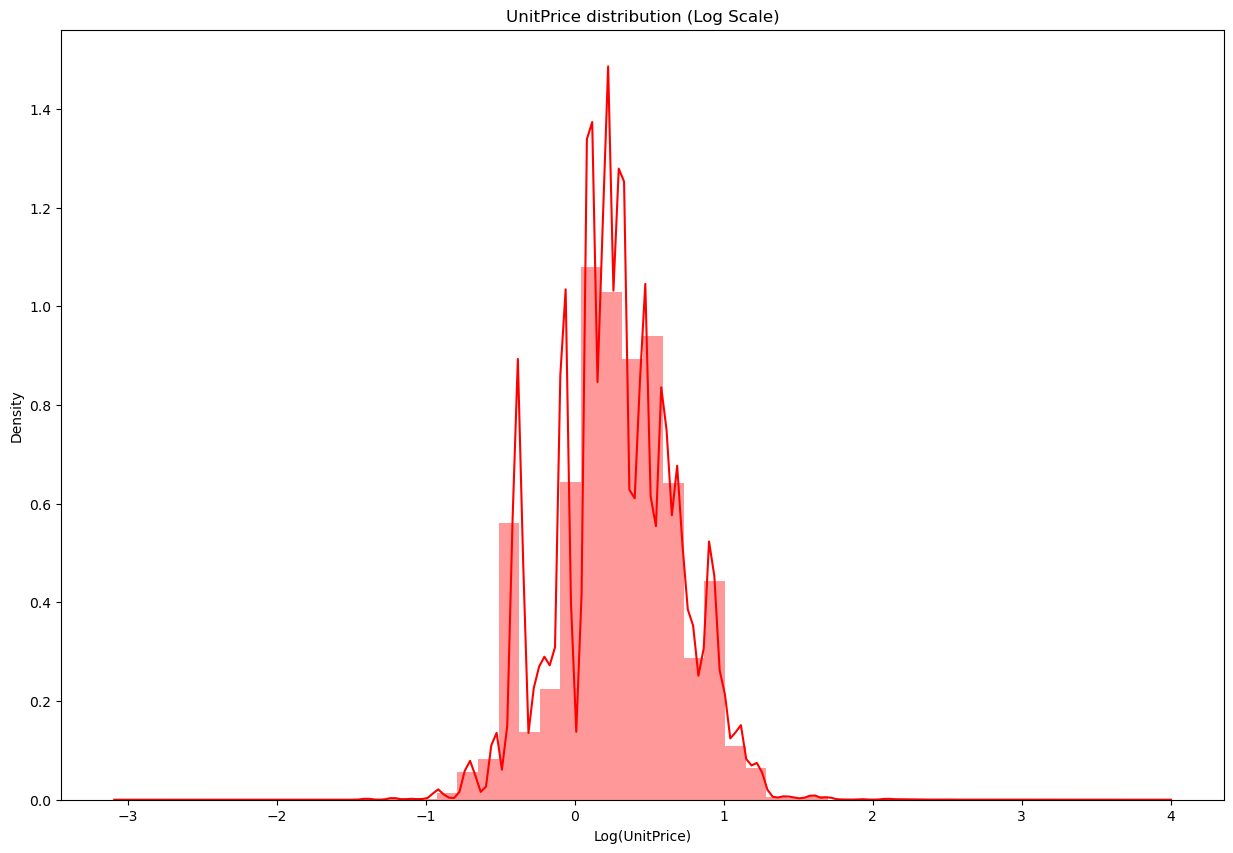

In [52]:
valid_prices = df[df['UnitPrice'] > 0]['UnitPrice']

plt.figure(figsize=(15,10))
plt.title('UnitPrice distribution (Log Scale)')
sns.distplot(np.log10(valid_prices), color="r")
plt.xlabel('Log(UnitPrice)')
plt.ylabel('Density')
plt.show()

In [53]:
#Converting InvoiceDate columns into date time format
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="%Y-%m-%d %H:%M:%S")

In [54]:
#Creating a new features from Invoicedate
df['Month']=df['InvoiceDate'].dt.month_name()
df['Day']=df['InvoiceDate'].dt.day_name()
df['Hour']=df['InvoiceDate'].dt.hour

In [55]:
#Creating a new feature TotalAmount from product of Quantity and Unitprice
df['TotalAmount']=df['Quantity']*df['UnitPrice']

In [59]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,Hour,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,December,Wednesday,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,December,Wednesday,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,8,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,December,Friday,12,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,December,Friday,12,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,December,Friday,12,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,December,Friday,12,16.60


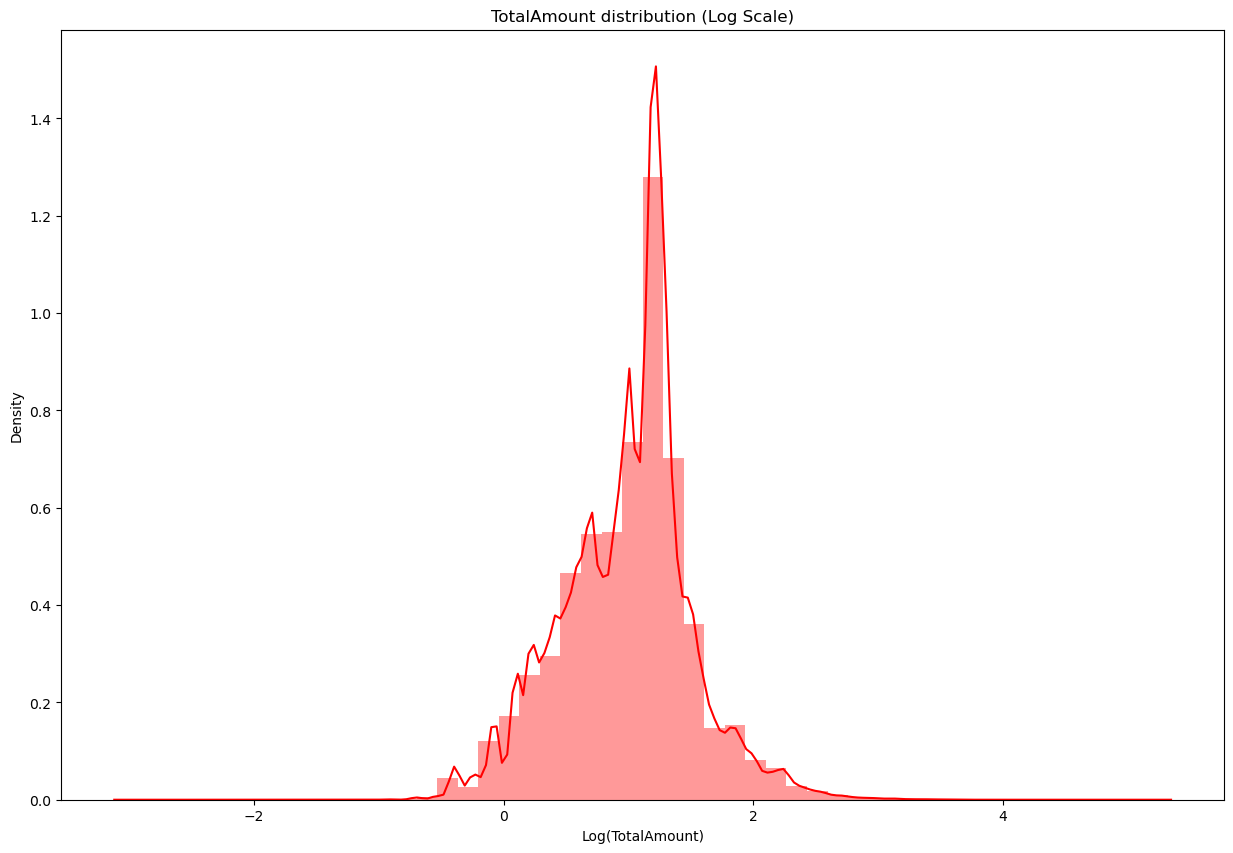

In [60]:
valid_prices = df[df['TotalAmount'] > 0]['TotalAmount']

plt.figure(figsize=(15,10))
plt.title('TotalAmount distribution (Log Scale)')
sns.distplot(np.log10(valid_prices), color="r")
plt.xlabel('Log(TotalAmount)')
plt.ylabel('Density')
plt.show()

In [61]:
#creating month dataframe
month_df=df['Month'].value_counts().reset_index()
month_df.rename(columns={'index': 'Month_Name'}, inplace=True)
# month_df.rename(columns={'Month': 'Count'}, inplace=True)
month_df

,Month,count
0,November,64545
1,October,49557
2,December,43464
3,September,40030
4,May,28322
5,June,27185
6,March,27177
7,August,27013
8,July,26827
9,April,22644


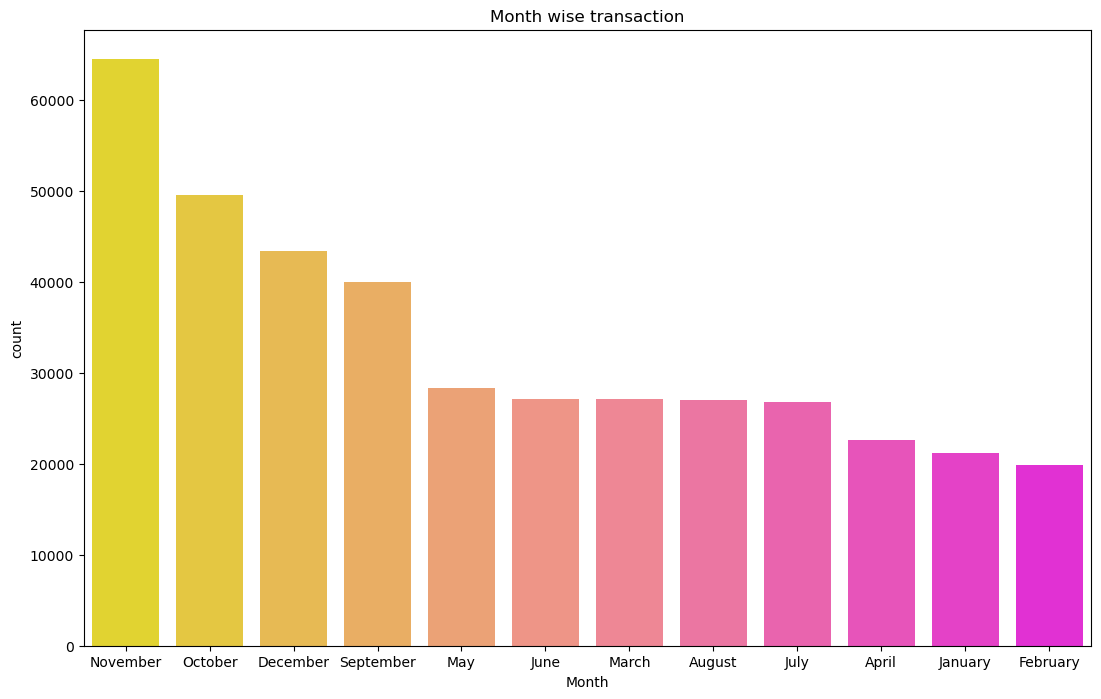

In [62]:
#plotting for month
plt.figure(figsize=(13,8))
plt.title('Month wise transaction')
sns.barplot(x='Month',y='count',data=month_df,palette='spring_r');

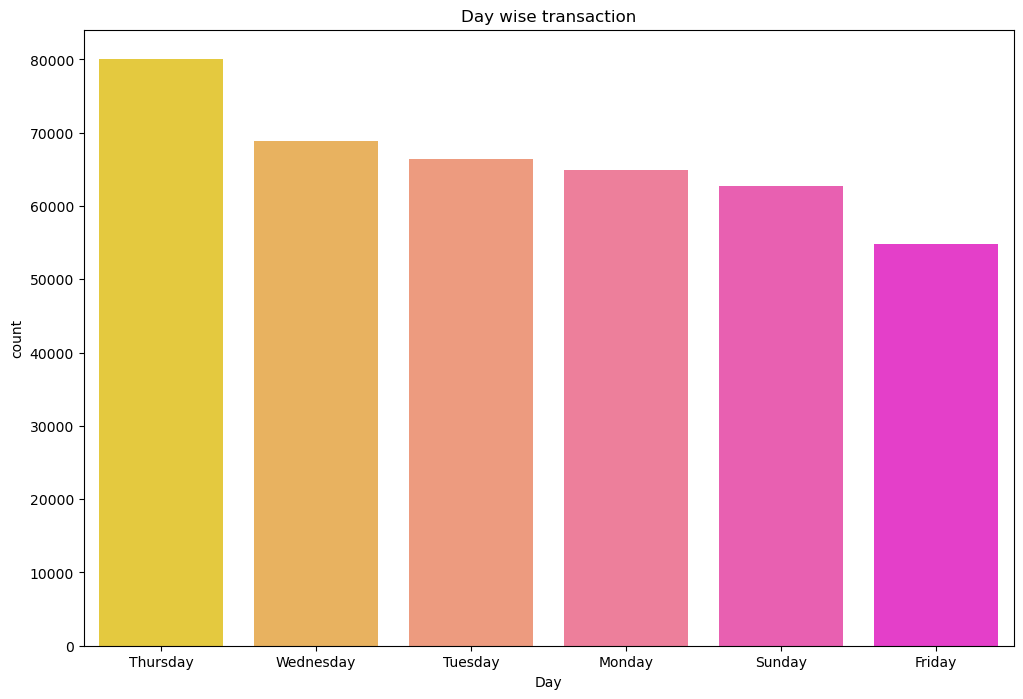

In [64]:
#creating day dataframe
day_df=df['Day'].value_counts().reset_index()
day_df.rename(columns={'index': 'Day_Name'}, inplace=True)
# day_df.rename(columns={'Day': 'Count'}, inplace=True)
day_df

#plotting for days
plt.figure(figsize=(12,8))
plt.title('Day wise transaction')
sns.barplot(x='Day',y='count',data=day_df, palette='spring_r');

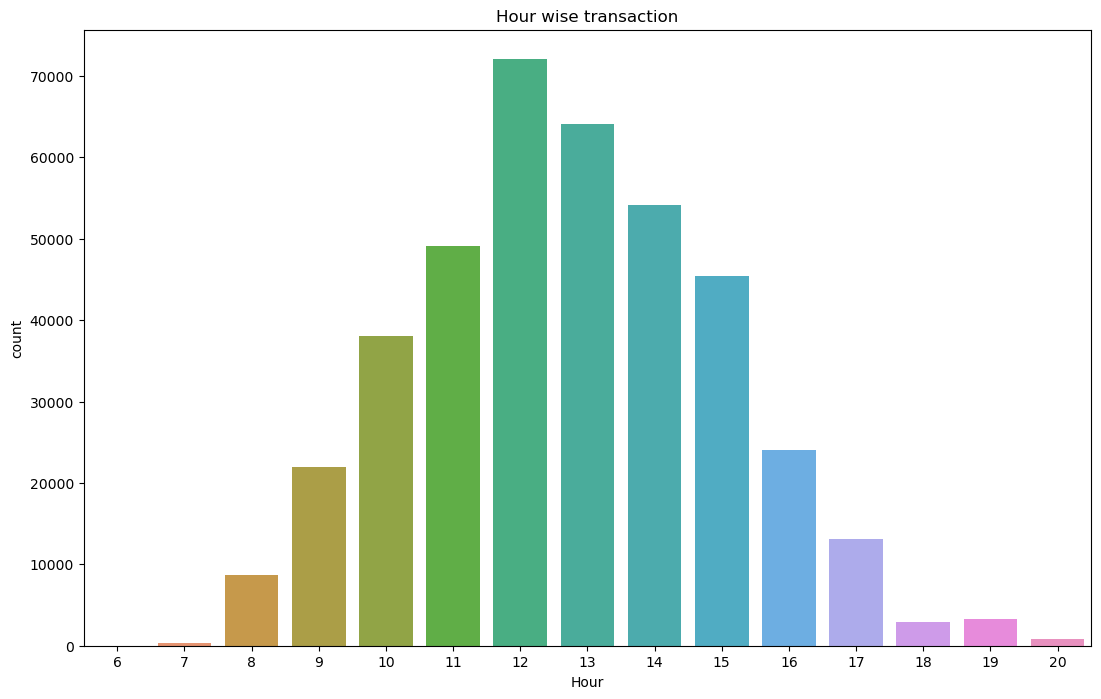

In [66]:
#Creating hour dataframe
hour_df=df['Hour'].value_counts().reset_index()
hour_df.rename(columns={'index': 'Hours'}, inplace=True)
# hour_df.rename(columns={'Hour': 'Count'}, inplace=True)
hour_df

#plotting for hour
plt.figure(figsize=(13,8))
plt.title('Hour wise transaction')
sns.barplot(x='Hour',y='count',data=hour_df);

In [67]:
def time_type(time):
    if(time>=6 and time<=11):
        return 'Morning'
    elif(time>=12 and time<=17):
        return 'Afternoon'
    else:
        return 'Evening'

In [68]:
#applying function we created on hour column
df['Time_type']=df['Hour'].apply(time_type)

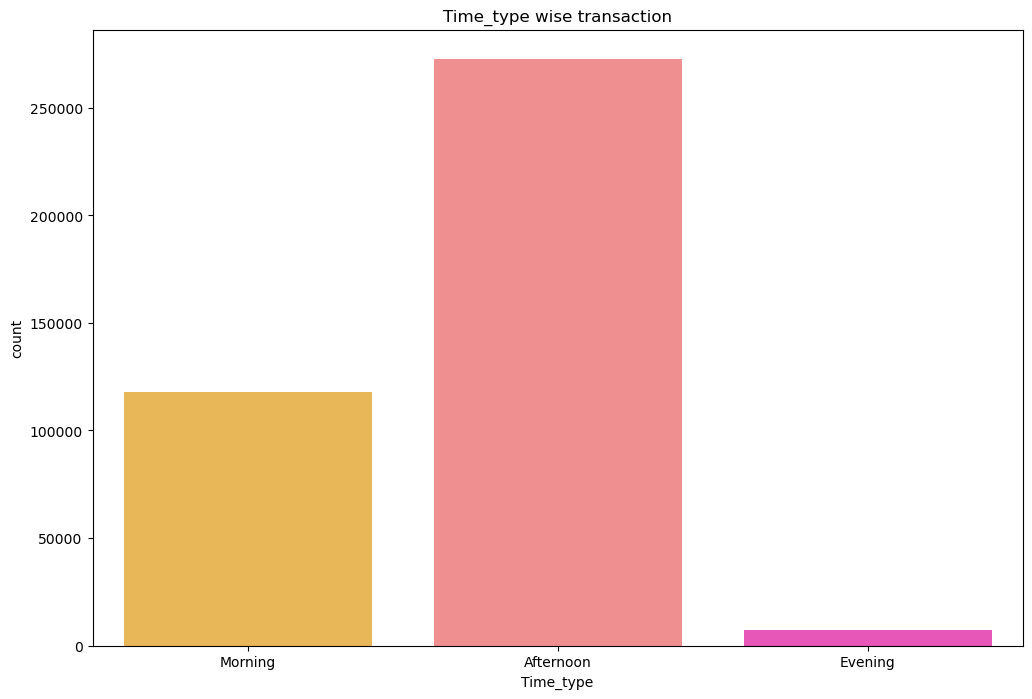

In [69]:
#plotting for time type
plt.figure(figsize=(12,8))
plt.title('Time_type wise transaction')
sns.countplot(x='Time_type',data=df, palette='spring_r');

In [80]:
Latest_Date = dt.datetime(2011, 12, 10) # Since the last purchase day may be the same day as 9th

# Group same customer transactions into a single record
grouped_df = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (Latest_Date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency (count of unique invoices)
    'TotalAmount': 'sum'  # Monetary (total sum of transactions)
})

# Rename columns to Recency, Frequency, and Monetary
grouped_df.rename(columns={
    'InvoiceDate': 'Recency', 
    'InvoiceNo': 'Frequency', 
    'TotalAmount': 'Monetary'
}, inplace=True)

In [81]:
grouped_df

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,18,1,1757.55
12350.0,310,1,334.40
...,...,...,...
18280.0,277,1,180.60
18281.0,180,1,80.82
18282.0,7,2,178.05


In [103]:
import datetime as dt

Latest_Date = dt.datetime(2011, 12, 10) # Assuming the last purchase day may be the same day as 9th

# Define aggregation functions
agg_funcs = {
    'InvoiceDate': lambda x: (Latest_Date - x.max()).days,  # Recency
    'InvoiceNo': ['nunique'],  # Frequency (count of unique invoices)
    'TotalAmount': ['sum', 'min', 'median', 'max']  # Monetary (aggregations)
}

# Group same customer transactions into a single record and aggregate variables
monetary_df = df.groupby('CustomerID').agg(agg_funcs)

# Rename columns to Recency, Frequency, and Monetary
monetary_df.columns = ['Recency', 'Frequency', 'Monetary_Sum', 'Monetary_Min', 'Monetary_Median', 'Monetary_Max']
monetary_df

,Recency,Frequency,Monetary_Sum,Monetary_Min,Monetary_Median,Monetary_Max
CustomerID,,,,,,
12346.0,325,1,77183.60,77183.60,77183.60,77183.60
12347.0,2,7,4310.00,5.04,17.00,249.60
12348.0,75,4,1797.24,13.20,41.76,240.00
12349.0,18,1,1757.55,6.64,17.70,300.00
12350.0,310,1,334.40,8.50,19.80,40.00
...,...,...,...,...,...,...
18280.0,277,1,180.60,14.85,17.70,23.70
18281.0,180,1,80.82,5.04,15.30,16.95
18282.0,7,2,178.05,5.04,13.71,25.50


In [184]:
# Normalize the variables using StandardScaler
scaler = StandardScaler()
normalized_data = scaler.fit_transform(monetary_df)

# Step 1: Perform Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(normalized_data)


# Step 2: Calculate Cluster Membership
monetary_df['Cluster'] = cluster_labels

# Step 3: Compute Distribution
cluster_distribution = monetary_df['Cluster'].value_counts().sort_index()
total_customers = len(monetary_df)

# Calculate ratio and percentage of customers per cluster
cluster_ratio = cluster_distribution / total_customers
cluster_percentage = cluster_ratio * 100

n_label = cluster_labels[cluster_labels != 2]

# Display distribution
print("Cluster Distribution:")
print(cluster_distribution)
print("\nRatio of customers per cluster:")
print(cluster_ratio)
print("\nPercentage of customers per cluster:")

Cluster Distribution:
Cluster
0    2971
1    1367
2       1
Name: count, dtype: int64

Ratio of customers per cluster:
Cluster
0    0.68472
1    0.31505
2    0.00023
Name: count, dtype: float64

Percentage of customers per cluster:


In [140]:
monetary_df

,Recency,Frequency,Monetary_Sum,Monetary_Min,Monetary_Median,Monetary_Max,Cluster
CustomerID,,,,,,,
12346.0,325,1,77183.60,77183.60,77183.60,77183.60,2
12347.0,2,7,4310.00,5.04,17.00,249.60,0
12348.0,75,4,1797.24,13.20,41.76,240.00,0
12349.0,18,1,1757.55,6.64,17.70,300.00,0
12350.0,310,1,334.40,8.50,19.80,40.00,1
...,...,...,...,...,...,...,...
18280.0,277,1,180.60,14.85,17.70,23.70,1
18281.0,180,1,80.82,5.04,15.30,16.95,1
18282.0,7,2,178.05,5.04,13.71,25.50,0


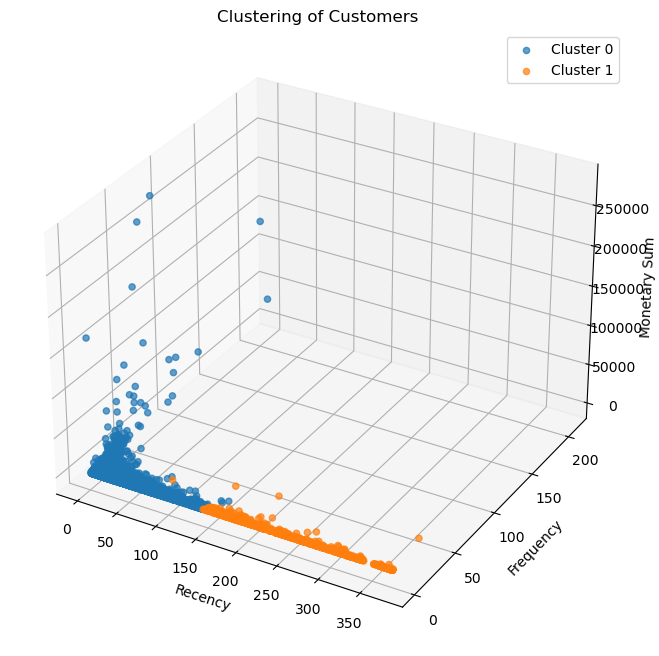

In [151]:
from mpl_toolkits.mplot3d import Axes3D

# Plot clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


for cluster in np.unique(n_label):
    ax.scatter(monetary_df[monetary_df['Cluster'] == cluster]['Recency'], 
               monetary_df[monetary_df['Cluster'] == cluster]['Frequency'], 
               monetary_df[monetary_df['Cluster'] == cluster]['Monetary_Sum'], 
               label=f'Cluster {cluster}', alpha=0.7)

ax.set_title('Clustering of Customers')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary Sum')
ax.legend()
plt.show()

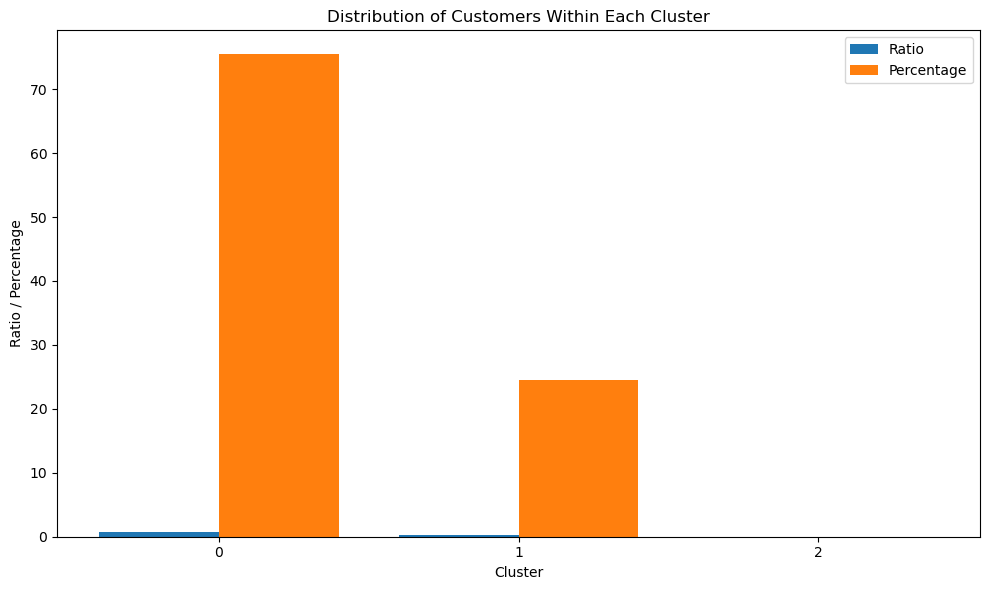

In [152]:
# Visualize ratio and percentage of customers per cluster in a single plot
plt.figure(figsize=(10, 6))

# Plot ratio
plt.bar(cluster_ratio.index - 0.2, cluster_ratio, width=0.4, label='Ratio')
# Plot percentage
plt.bar(cluster_percentage.index + 0.2, cluster_percentage, width=0.4, label='Percentage')

plt.title('Distribution of Customers Within Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Ratio / Percentage')
plt.xticks(cluster_ratio.index)
plt.legend()

plt.tight_layout()
plt.show()


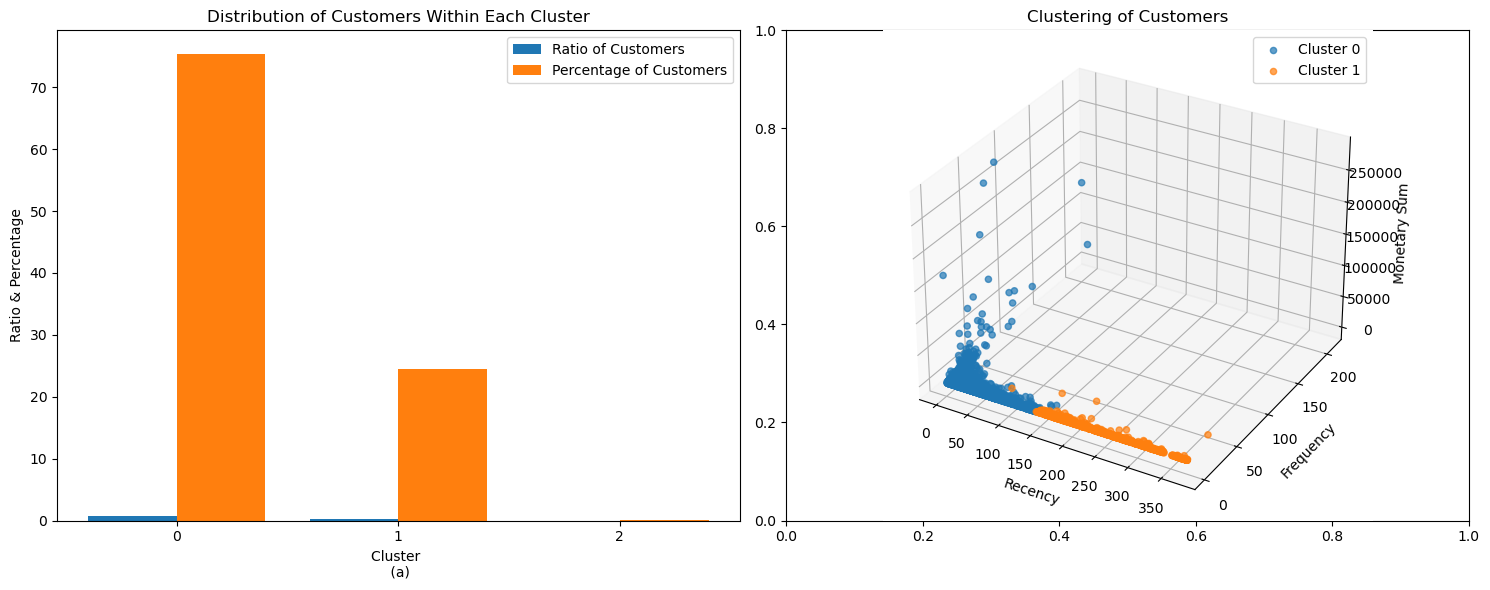

In [166]:
from mpl_toolkits.mplot3d import Axes3D

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot ratio and percentage
ax = axes[0]
ax.bar(cluster_ratio.index - 0.2, cluster_ratio, width=0.4, label='Ratio of Customers')
ax.bar(cluster_percentage.index + 0.2, cluster_percentage, width=0.4, label='Percentage of Customers')
ax.set_title('Distribution of Customers Within Each Cluster')
ax.set_xlabel('Cluster \n (a)')
ax.set_ylabel('Ratio & Percentage')
ax.set_xticks(cluster_ratio.index)
ax.legend()

# Plot clusters in 3D
ax = axes[1]

# Create 3D subplot directly
ax = fig.add_subplot(122, projection='3d')  # Use 122 for subplot index

for cluster in np.unique(n_label):
    ax.scatter(monetary_df[monetary_df['Cluster'] == cluster]['Recency'], 
               monetary_df[monetary_df['Cluster'] == cluster]['Frequency'], 
               monetary_df[monetary_df['Cluster'] == cluster]['Monetary_Sum'], 
               label=f'Cluster {cluster}', alpha=0.7)

ax.set_title('Clustering of Customers')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary Sum')
ax.legend()
plt.savefig("finding1.pdf")

plt.tight_layout()
plt.show()


In [170]:

df = monetary_df[monetary_df['Cluster'] != 2]

cluster_stats = df.groupby('Cluster').agg({'Recency': ['min', 'max', 'median'],
                                           'Frequency': ['min', 'max', 'median'],
                                           'Monetary_Sum': ['min', 'max', 'median']})

# Rename columns for clarity
cluster_stats.columns = ['Recency_min', 'Recency_max', 'Recency_median',
                         'Frequency_min', 'Frequency_max', 'Frequency_median',
                         'Monetary_min', 'Monetary_max', 'Monetary_median']

# Display the statistics
print("Statistics of Each Cluster:")
cluster_stats

Statistics of Each Cluster:


,Recency_min,Recency_max,Recency_median,Frequency_min,Frequency_max,Frequency_median,Monetary_min,Monetary_max,Monetary_median
Cluster,,,,,,,,,
0,0,163,30.0,1,210,3.0,0.00,280206.02,921.07
1,89,373,243.0,1,34,1.0,3.75,44534.30,310.26


In [185]:
# Define descriptions for each cluster based on distinct features
cluster_descriptions = {
    0: "Cluster 0 represents the most profitable customer group characterized by recent purchases (low recency), high frequency of purchases, and significant monetary spending. These customers are highly engaged and contribute substantially to revenue.",
    1: "Cluster 1 consists of customers with less recent purchases (moderate recency) and lower frequency of purchases. Although their monetary spending is relatively lower compared to Cluster 0, they still make valuable contributions to revenue. This group may include potential highly profitable customers who require targeted marketing efforts to increase engagement.",
}

# Display descriptions for each cluster
for cluster, description in cluster_descriptions.items():
    print(f"Cluster {cluster}: {description}")


Cluster 0: Cluster 0 represents the most profitable customer group characterized by recent purchases (low recency), high frequency of purchases, and significant monetary spending. These customers are highly engaged and contribute substantially to revenue.
Cluster 1: Cluster 1 consists of customers with less recent purchases (moderate recency) and lower frequency of purchases. Although their monetary spending is relatively lower compared to Cluster 0, they still make valuable contributions to revenue. This group may include potential highly profitable customers who require targeted marketing efforts to increase engagement.


For n_clusters = 2 The average silhouette_score is : 0.8958528715697585
For n_clusters = 3 The average silhouette_score is : 0.5938712415770943
For n_clusters = 4 The average silhouette_score is : 0.6160983833605996
For n_clusters = 5 The average silhouette_score is : 0.6172345247427622
For n_clusters = 6 The average silhouette_score is : 0.5982341635958884
For n_clusters = 7 The average silhouette_score is : 0.5168117124010786
For n_clusters = 8 The average silhouette_score is : 0.47694442418475885
For n_clusters = 9 The average silhouette_score is : 0.4778738281231627
For n_clusters = 10 The average silhouette_score is : 0.42748306857716795


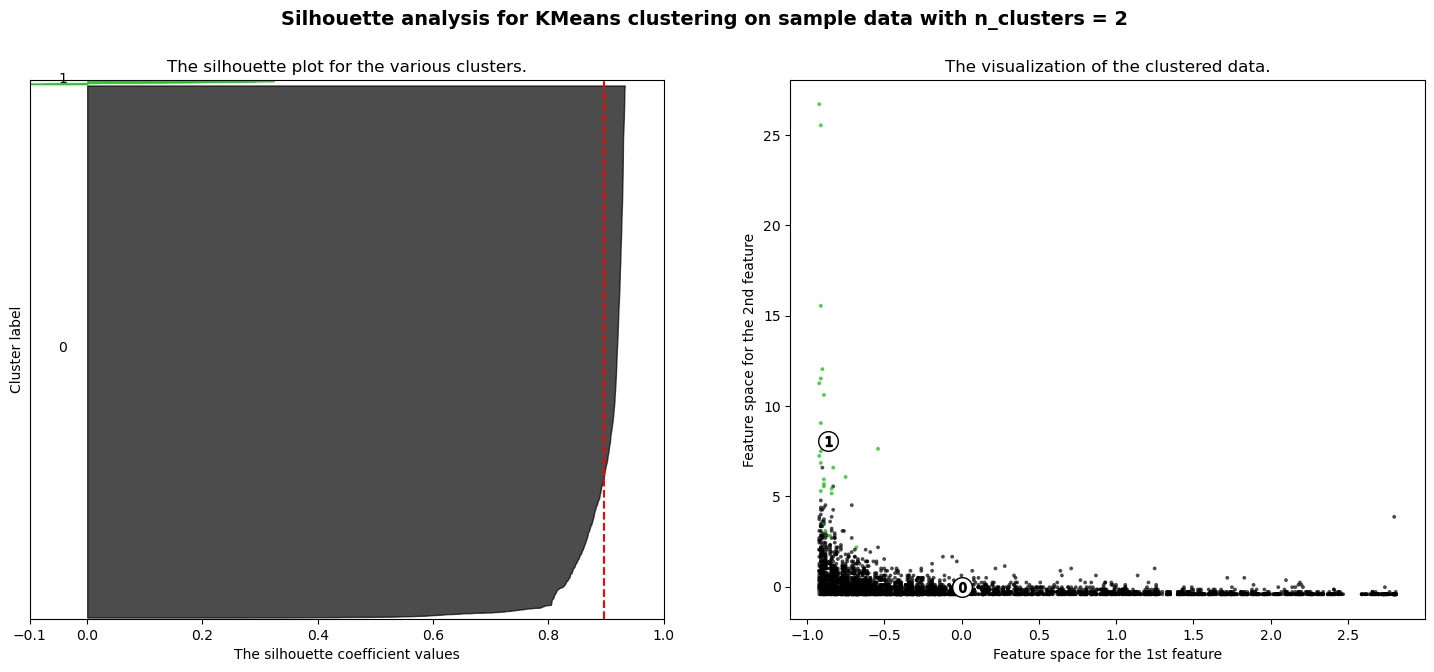

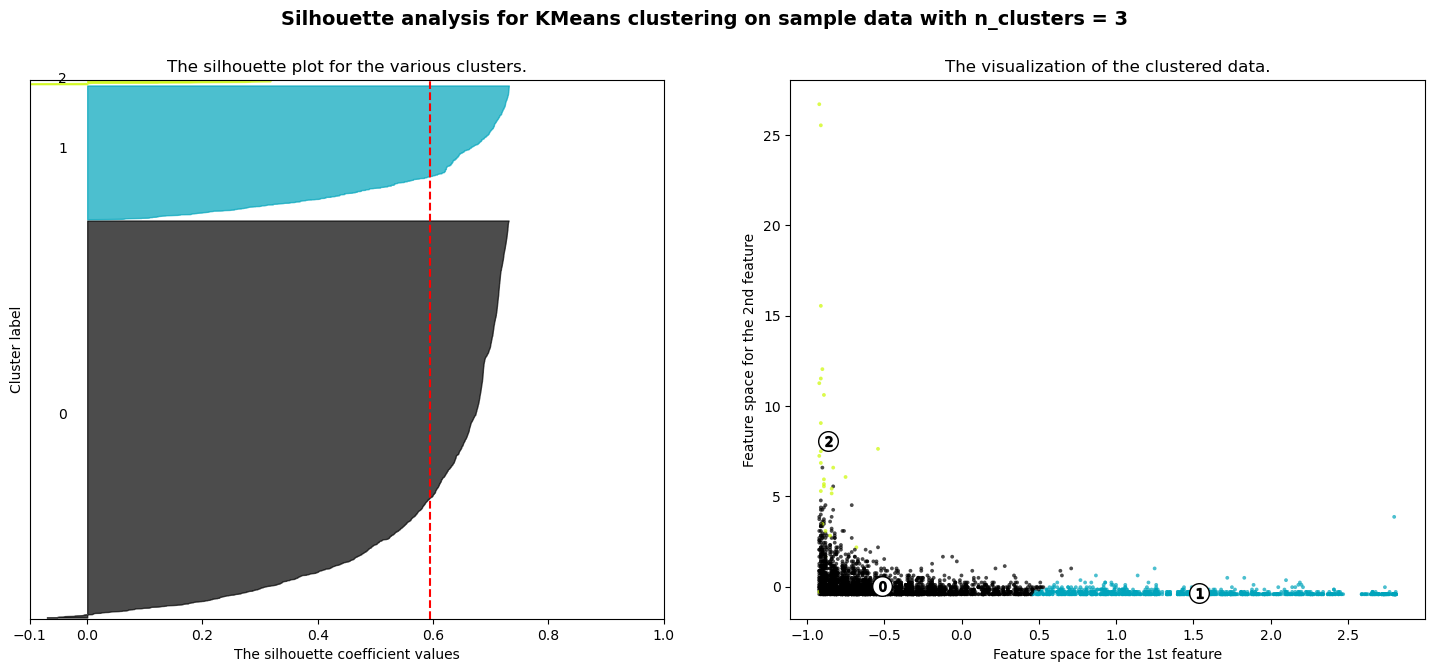

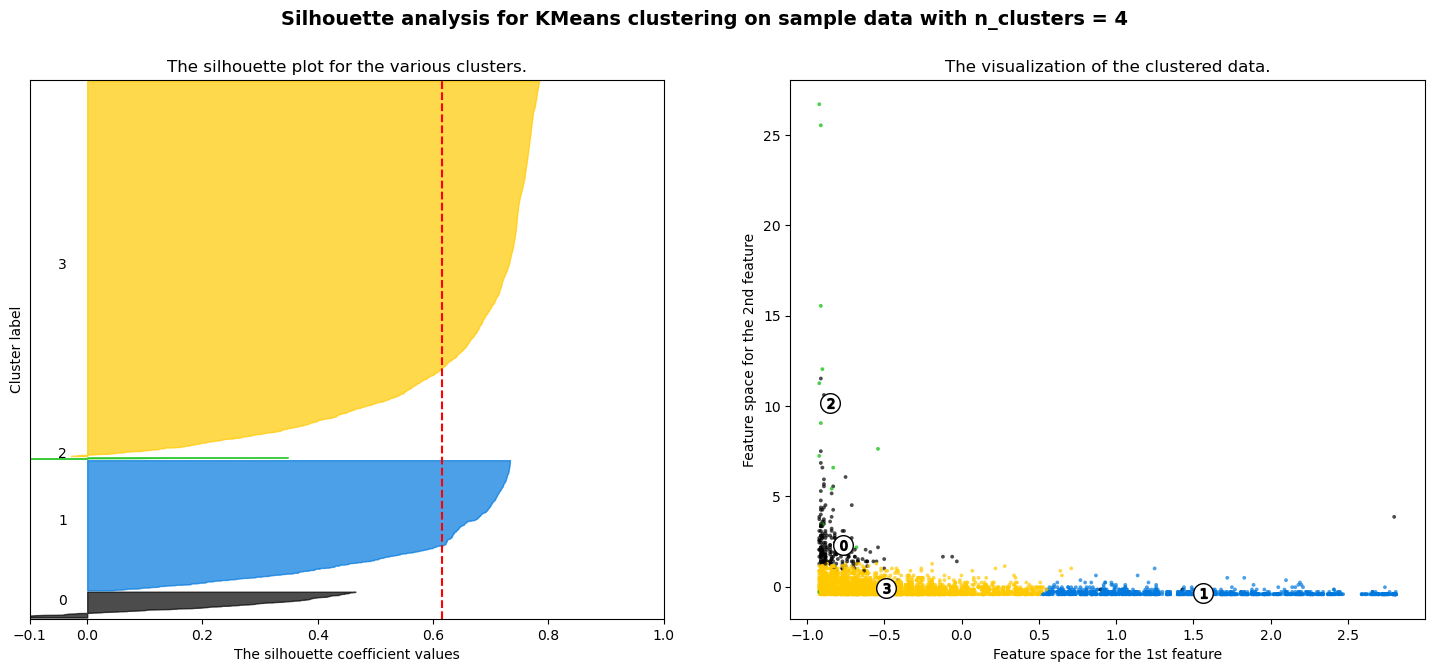

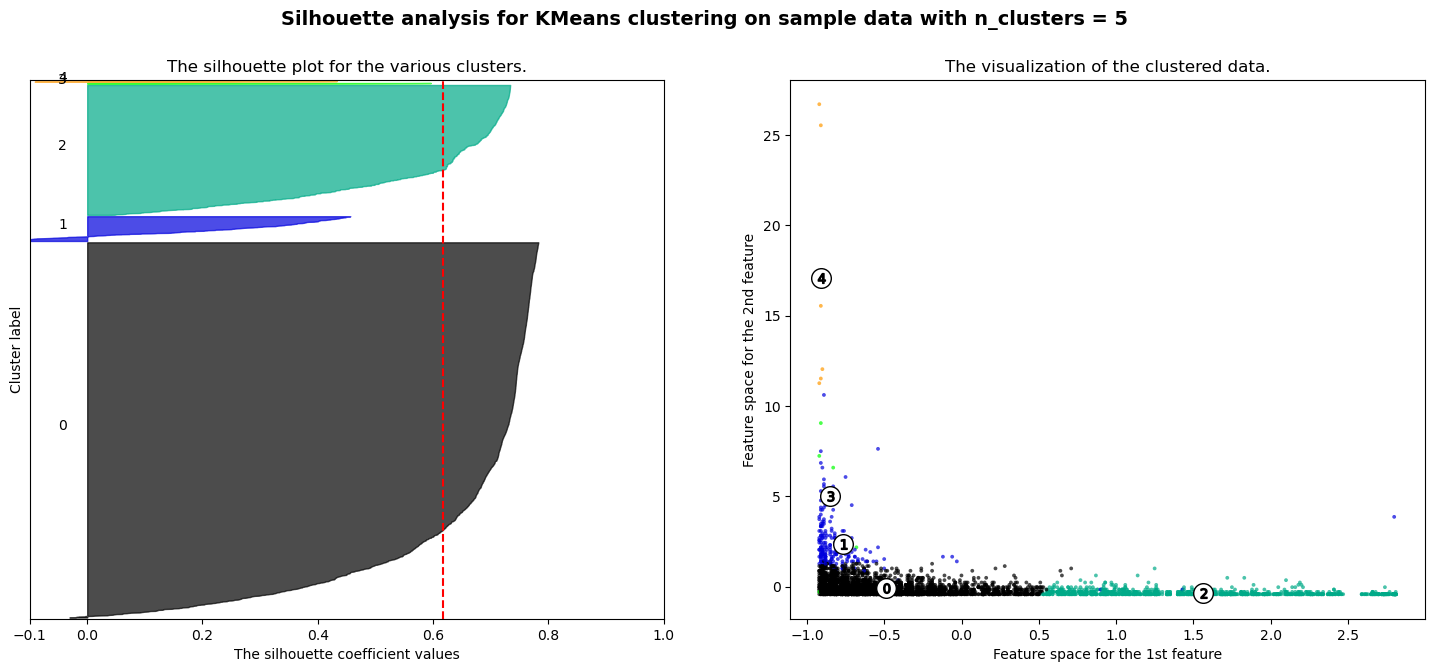

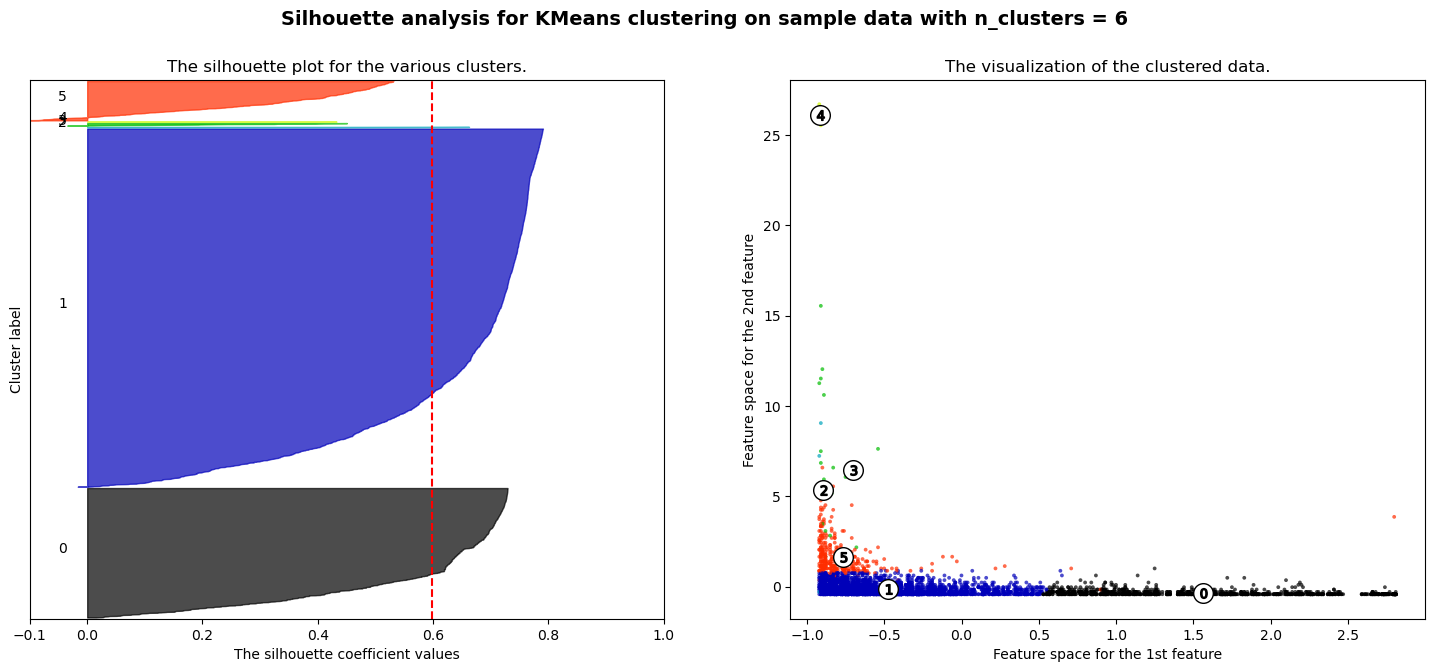

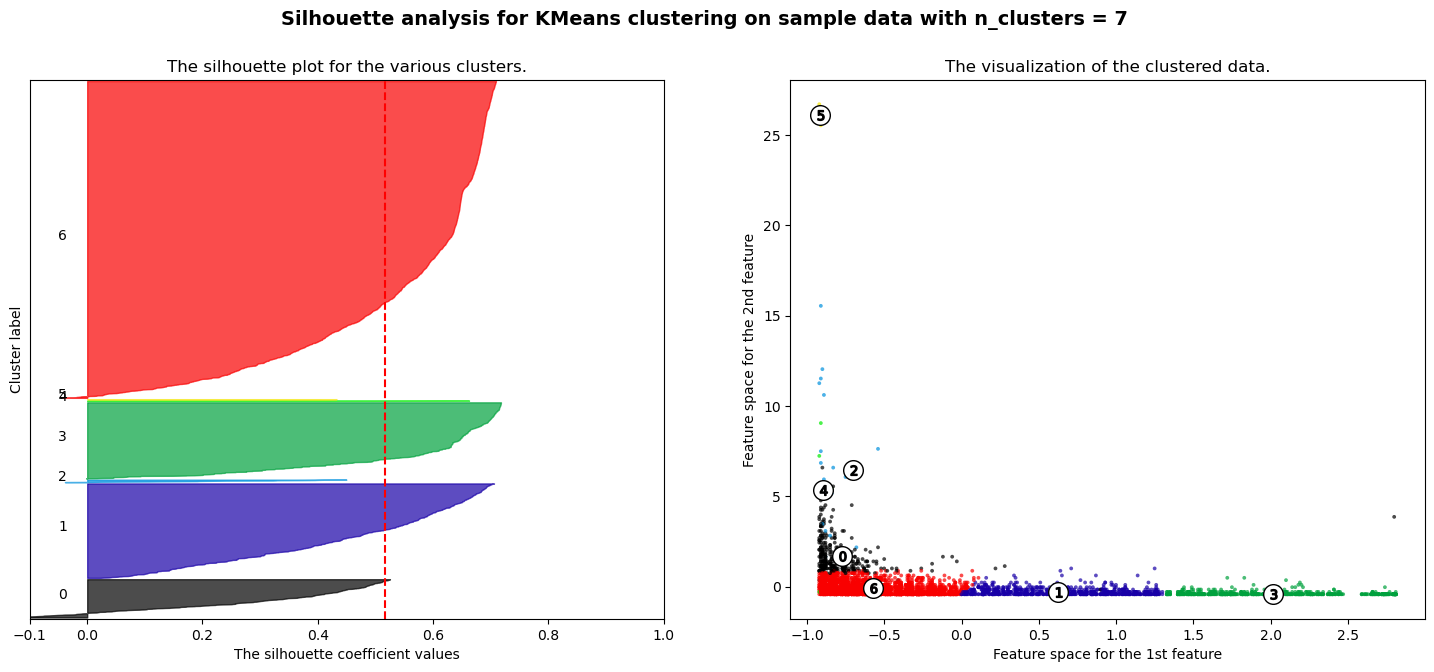

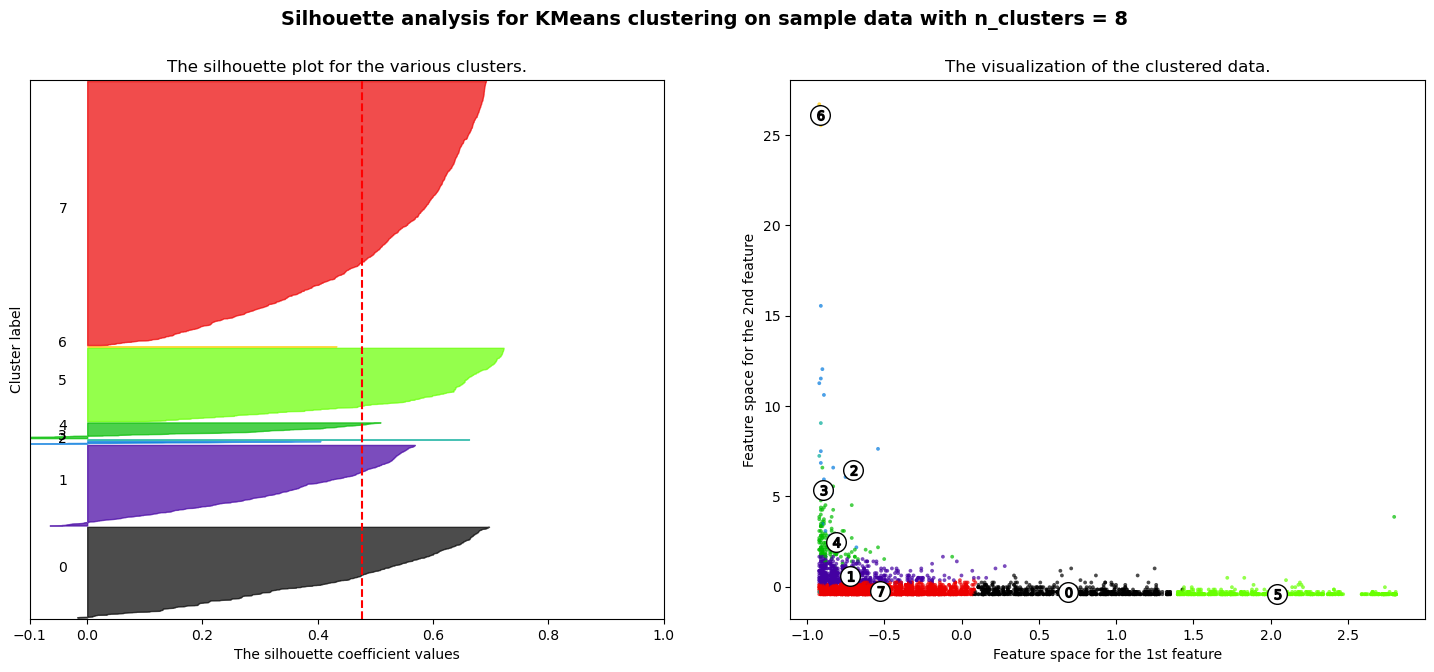

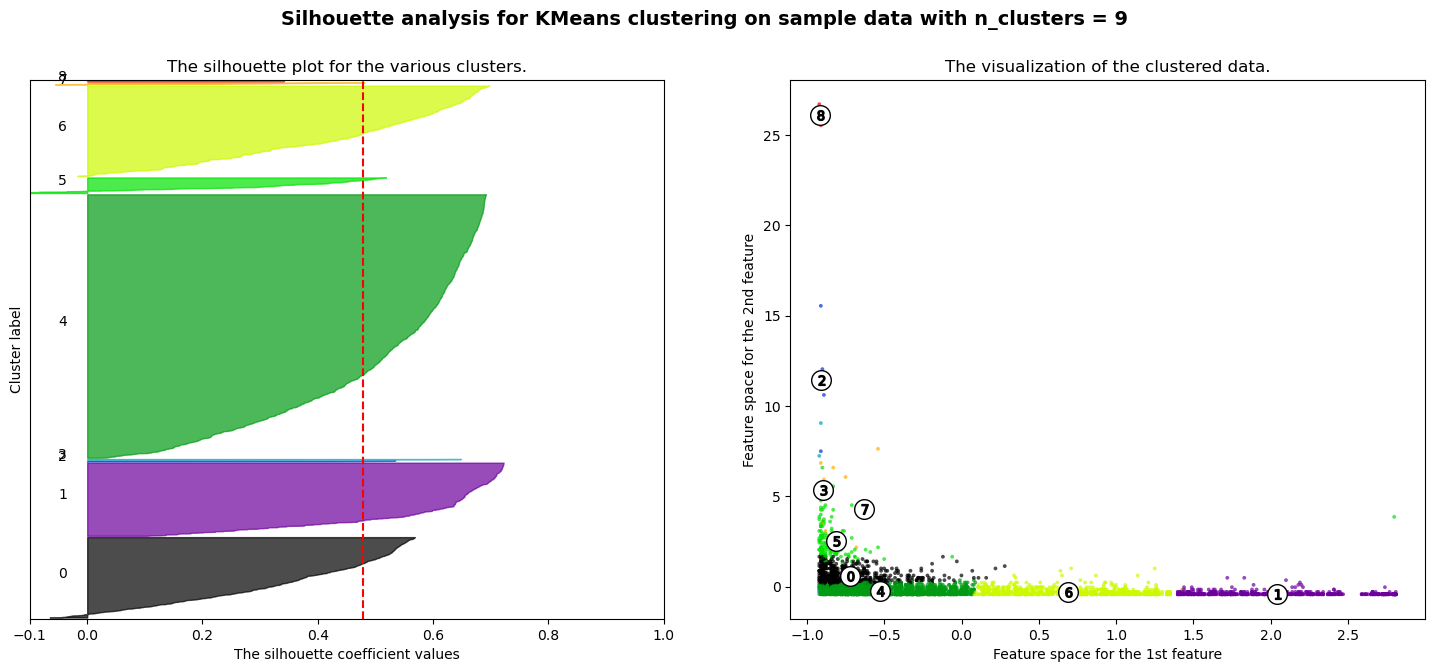

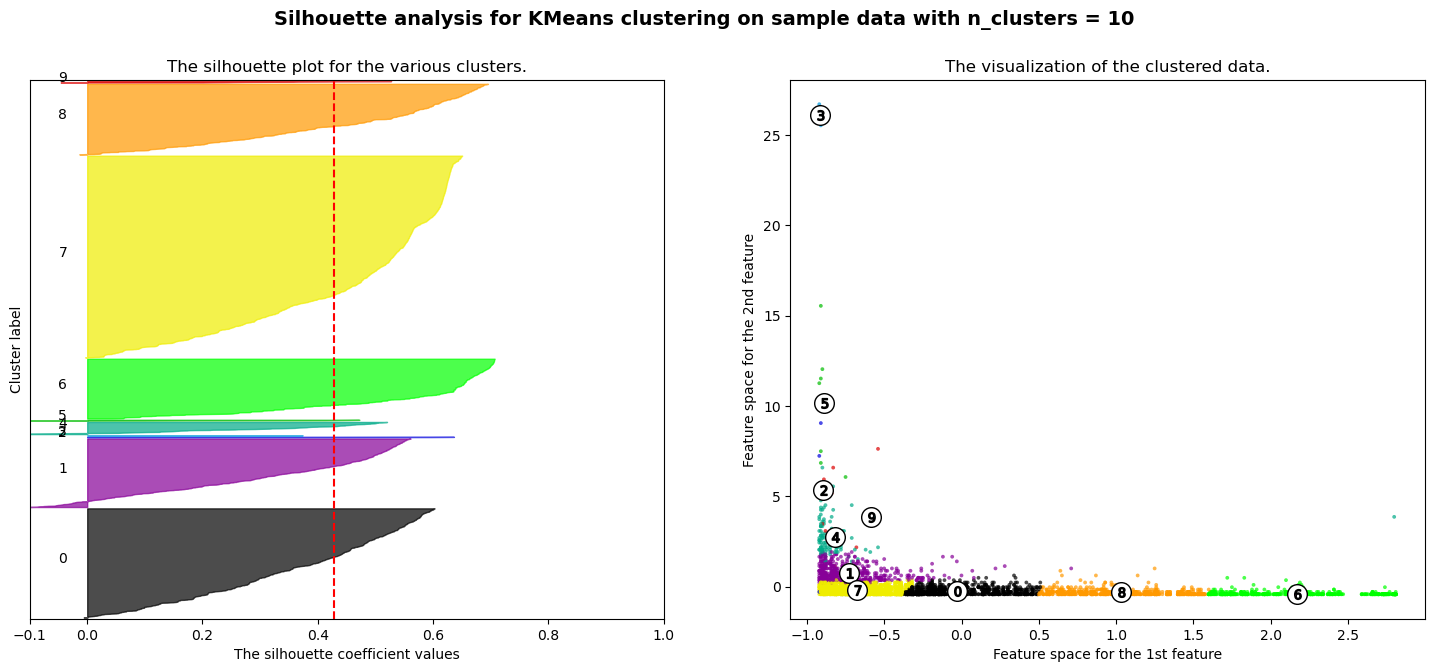

In [192]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
import matplotlib.cm as cm

feature_vector=['Recency','Frequency','Monetary_Sum']
X_features=monetary_df[feature_vector].values
scaler=StandardScaler()
X=scaler.fit_transform(X_features)

range_n_clusters = [2,3,4,5,6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

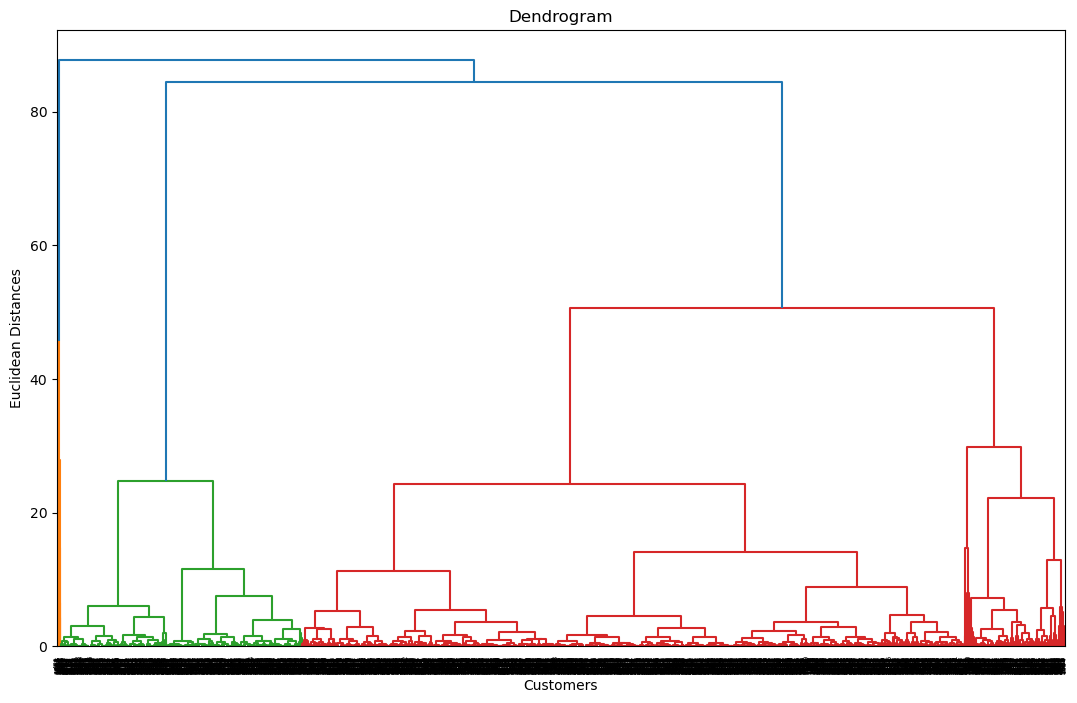

In [190]:
import scipy.cluster.hierarchy as sch

feature_vector=['Recency','Frequency','Monetary_Sum']
X_features=monetary_df[feature_vector].values
scaler=StandardScaler()
X=scaler.fit_transform(X_features)

range_n_clusters = [2,3,4,5,6,7,8,9,10]
# Creating a dendrogram to visualize the clusters
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show() 

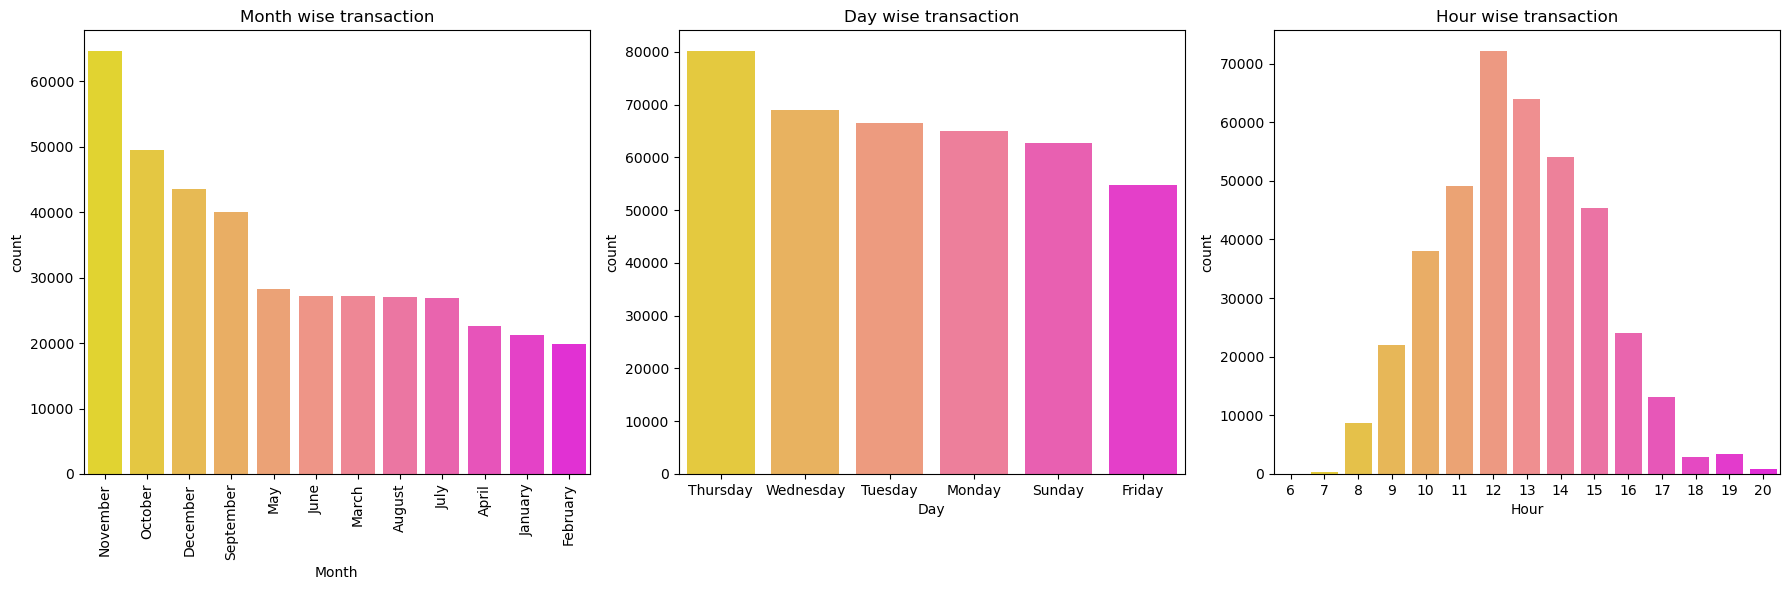

In [195]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.title('Month wise transaction')
sns.barplot(x='Month', y='count', data=month_df, palette='spring_r');
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees

# Plotting for days
plt.subplot(1, 3, 2)
plt.title('Day wise transaction')
sns.barplot(x='Day', y='count', data=day_df, palette='spring_r');

# Plotting for hour
plt.subplot(1, 3, 3)
plt.title('Hour wise transaction')
sns.barplot(x='Hour', y='count', data=hour_df, palette='spring_r');

plt.savefig("transactions.pdf")

plt.tight_layout()
plt.show()